<a href="https://colab.research.google.com/github/youssefbourais0310/Neural_Networks/blob/main/project_pro2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# # Unzip the uploaded data into google drive 
# !unzip "/content/drive/MyDrive/project/train.zip" -d "/content/drive/MyDrive/project"

In [1]:
# # Unzip the uploaded data into google drive 
# !unzip "/content/drive/MyDrive/project/valid.zip" -d "/content/drive/MyDrive/project"

In [1]:
import numpy as np
import pandas as pd
from keras.applications import xception
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams['font.size'] = 16
import tensorflow as tf
import datetime as dt
import random
from mpl_toolkits.axes_grid1 import ImageGrid
from tqdm import tqdm
import datetime
import tensorflow_hub as hub

In [2]:
CATEGORIES = ["05791_Plantae_Tracheophyta_Liliopsida_Alismatales_Araceae_Alocasia_odora"
,"05798_Plantae_Tracheophyta_Liliopsida_Alismatales_Araceae_Epipremnum_aureum"
,"05809_Plantae_Tracheophyta_Liliopsida_Alismatales_Araceae_Zantedeschia_aethiopica"
,"05832_Plantae_Tracheophyta_Liliopsida_Arecales_Arecaceae_Washingtonia_filifera"
,"05833_Plantae_Tracheophyta_Liliopsida_Arecales_Arecaceae_Washingtonia_robusta"
,"05892_Plantae_Tracheophyta_Liliopsida_Asparagales_Asparagaceae_Cordyline_fruticosa"
,"05925_Plantae_Tracheophyta_Liliopsida_Asparagales_Asparagaceae_Ruscus_aculeatus"
,"05946_Plantae_Tracheophyta_Liliopsida_Asparagales_Asphodelaceae_Aloe_vera"
,"05998_Plantae_Tracheophyta_Liliopsida_Asparagales_Orchidaceae_Arundina_graminifolia"
,"06115_Plantae_Tracheophyta_Liliopsida_Commelinales_Commelinaceae_Tradescantia_zebrina"
,"06126_Plantae_Tracheophyta_Liliopsida_Liliales_Colchicaceae_Gloriosa_superba"
,"06281_Plantae_Tracheophyta_Liliopsida_Poales_Cyperaceae_Cyperus_rotundus"
,"06455_Plantae_Tracheophyta_Liliopsida_Zingiberales_Zingiberaceae_Alpinia_zerumbet"
,"06457_Plantae_Tracheophyta_Liliopsida_Zingiberales_Zingiberaceae_Hedychium_coronarium"
,"06577_Plantae_Tracheophyta_Magnoliopsida_Apiales_Pittosporaceae_Pittosporum_tenuifolium"
,"06579_Plantae_Tracheophyta_Magnoliopsida_Aquifoliales_Aquifoliaceae_Ilex_aquifolium"
,"06589_Plantae_Tracheophyta_Magnoliopsida_Asterales_Argophyllaceae_Corokia_cotoneaster"
,"06786_Plantae_Tracheophyta_Magnoliopsida_Asterales_Asteraceae_Eupatorium_cannabinum"
,"07285_Plantae_Tracheophyta_Magnoliopsida_Brassicales_Caricaceae_Carica_papaya"
,"07339_Plantae_Tracheophyta_Magnoliopsida_Caryophyllales_Basellaceae_Anredera_cordifolia"
,"07515_Plantae_Tracheophyta_Magnoliopsida_Caryophyllales_Plumbaginaceae_Plumbago_auriculata"
,"07517_Plantae_Tracheophyta_Magnoliopsida_Caryophyllales_Polygonaceae_Antigonon_leptopus"
,"07524_Plantae_Tracheophyta_Magnoliopsida_Caryophyllales_Polygonaceae_Coccoloba_uvifera"
,"07681_Plantae_Tracheophyta_Magnoliopsida_Dipsacales_Viburnaceae_Viburnum_lantana"
,"07844_Plantae_Tracheophyta_Magnoliopsida_Ericales_Primulaceae_Ardisia_crenata"
,"07903_Plantae_Tracheophyta_Magnoliopsida_Fabales_Fabaceae_Albizia_julibrissin"
,"07925_Plantae_Tracheophyta_Magnoliopsida_Fabales_Fabaceae_Caesalpinia_pulcherrima"
,"07926_Plantae_Tracheophyta_Magnoliopsida_Fabales_Fabaceae_Calliandra_eriophylla"
,"08029_Plantae_Tracheophyta_Magnoliopsida_Fabales_Fabaceae_Mimosa_pudica"
,"08267_Plantae_Tracheophyta_Magnoliopsida_Gentianales_Apocynaceae_Catharanthus_roseus"
,"08278_Plantae_Tracheophyta_Magnoliopsida_Gentianales_Apocynaceae_Nerium_oleander"
,"08280_Plantae_Tracheophyta_Magnoliopsida_Gentianales_Apocynaceae_Plumeria_rubra"
,"08292_Plantae_Tracheophyta_Magnoliopsida_Gentianales_Gentianaceae_Eustoma_exaltatum"
,"08353_Plantae_Tracheophyta_Magnoliopsida_Gentianales_Rubiaceae_Ixora_coccinea"
,"08389_Plantae_Tracheophyta_Magnoliopsida_Geraniales_Geraniaceae_Pelargonium_capitatum"
,"08391_Plantae_Tracheophyta_Magnoliopsida_Geraniales_Geraniaceae_Pelargonium_triste"
,"08410_Plantae_Tracheophyta_Magnoliopsida_Lamiales_Acanthaceae_Thunbergia_alata"
,"08421_Plantae_Tracheophyta_Magnoliopsida_Lamiales_Bignoniaceae_Tecomaria_capensis"
,"08442_Plantae_Tracheophyta_Magnoliopsida_Lamiales_Lamiaceae_Glechoma_hederacea"
,"08496_Plantae_Tracheophyta_Magnoliopsida_Lamiales_Lamiaceae_Salvia_rosmarinus"
,"08531_Plantae_Tracheophyta_Magnoliopsida_Lamiales_Lentibulariaceae_Pinguicula_vulgaris"
,"08555_Plantae_Tracheophyta_Magnoliopsida_Lamiales_Oleaceae_Ligustrum_vulgare"
,"08641_Plantae_Tracheophyta_Magnoliopsida_Lamiales_Plantaginaceae_Cymbalaria_muralis"
,"08723_Plantae_Tracheophyta_Magnoliopsida_Lamiales_Verbenaceae_Duranta_erecta"
,"08947_Plantae_Tracheophyta_Magnoliopsida_Malvales_Malvaceae_Hibiscus_rosa-sinensis"
,"08982_Plantae_Tracheophyta_Magnoliopsida_Malvales_Malvaceae_Thespesia_populnea"
,"08999_Plantae_Tracheophyta_Magnoliopsida_Myrtales_Lythraceae_Lagerstroemia_indica"
,"09003_Plantae_Tracheophyta_Magnoliopsida_Myrtales_Lythraceae_Punica_granatum"
,"09013_Plantae_Tracheophyta_Magnoliopsida_Myrtales_Myrtaceae_Leptospermum_scoparium"
,"09016_Plantae_Tracheophyta_Magnoliopsida_Myrtales_Myrtaceae_Metrosideros_excelsa"
,"09093_Plantae_Tracheophyta_Magnoliopsida_Oxalidales_Oxalidaceae_Oxalis_corniculata"
,"09153_Plantae_Tracheophyta_Magnoliopsida_Ranunculales_Berberidaceae_Nandina_domestica"
,"09310_Plantae_Tracheophyta_Magnoliopsida_Rosales_Moraceae_Ficus_pumila"
,"09508_Plantae_Tracheophyta_Magnoliopsida_Rosales_Urticaceae_Boehmeria_cylindrica"
,"09531_Plantae_Tracheophyta_Magnoliopsida_Sapindales_Anacardiaceae_Mangifera_indica"
,"09595_Plantae_Tracheophyta_Magnoliopsida_Saxifragales_Crassulaceae_Cotyledon_orbiculata"
,"09714_Plantae_Tracheophyta_Magnoliopsida_Solanales_Solanaceae_Capsicum_annuum"
,"09717_Plantae_Tracheophyta_Magnoliopsida_Solanales_Solanaceae_Datura_stramonium"
,"09758_Plantae_Tracheophyta_Magnoliopsida_Vitales_Vitaceae_Parthenocissus_tricuspidata"
,"09893_Plantae_Tracheophyta_Polypodiopsida_Polypodiales_Aspleniaceae_Asplenium_ceterach"
,"09951_Plantae_Tracheophyta_Polypodiopsida_Polypodiales_Nephrolepidaceae_Nephrolepis_cordifolia"
,"09987_Plantae_Tracheophyta_Polypodiopsida_Polypodiales_Pteridaceae_Pteris_vittata"]

NUM_CATEGORIES = len(CATEGORIES)
print(NUM_CATEGORIES)

62


In [3]:
import os
SAMPLE_PER_CATEGORY = 300
data_dir = '/content/drive/MyDrive/project'
train_dir = os.path.join(data_dir, '/content/drive/MyDrive/project/A_training_image_plants')
test_dir = os.path.join(data_dir, '/content/drive/MyDrive/project/les photos de validation')

In [4]:
for category in CATEGORIES:
    print('{} {} images'.format(category, len(os.listdir(os.path.join(train_dir, category)))))

05791_Plantae_Tracheophyta_Liliopsida_Alismatales_Araceae_Alocasia_odora 300 images
05798_Plantae_Tracheophyta_Liliopsida_Alismatales_Araceae_Epipremnum_aureum 277 images
05809_Plantae_Tracheophyta_Liliopsida_Alismatales_Araceae_Zantedeschia_aethiopica 300 images
05832_Plantae_Tracheophyta_Liliopsida_Arecales_Arecaceae_Washingtonia_filifera 300 images
05833_Plantae_Tracheophyta_Liliopsida_Arecales_Arecaceae_Washingtonia_robusta 300 images
05892_Plantae_Tracheophyta_Liliopsida_Asparagales_Asparagaceae_Cordyline_fruticosa 300 images
05925_Plantae_Tracheophyta_Liliopsida_Asparagales_Asparagaceae_Ruscus_aculeatus 300 images
05946_Plantae_Tracheophyta_Liliopsida_Asparagales_Asphodelaceae_Aloe_vera 274 images
05998_Plantae_Tracheophyta_Liliopsida_Asparagales_Orchidaceae_Arundina_graminifolia 300 images
06115_Plantae_Tracheophyta_Liliopsida_Commelinales_Commelinaceae_Tradescantia_zebrina 300 images
06126_Plantae_Tracheophyta_Liliopsida_Liliales_Colchicaceae_Gloriosa_superba 284 images
06281_P

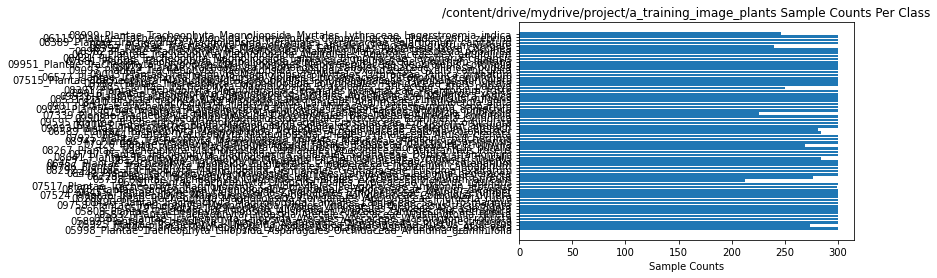

In [5]:
sample_counts= {}
train = "/content/drive/MyDrive/project/A_training_image_plants"

for i, d in enumerate([train]):

    classes= []
    sample_counts[d]= []

    for f in os.listdir(d):
        train_class_path= os.path.join(d, f)
        if os.path.isdir(train_class_path):
            classes.append(f)
            sample_counts[d].append(len(os.listdir(train_class_path)))

    #fig, ax= plt.subplot(221+i)
    fig, ax = plt.subplots()

    # Example data
    y_pos = np.arange(len(classes))

    ax.barh(y_pos, sample_counts[d], align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(classes)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Sample Counts')
    ax.set_title('{} Sample Counts Per Class'.format(d.capitalize()))

plt.show()

In [6]:
train = []
for category_id, category in enumerate(CATEGORIES):
    for file in os.listdir(os.path.join(train_dir, category)):
        train.append(['/content/drive/MyDrive/project/A_training_image_plants/{}/{}'.format(category, file), category_id, category])
train = pd.DataFrame(train, columns=['file', 'category_id', 'category'])
# train.head()
train.shape
train

,file,category_id,category
0,/content/drive/MyDrive/project/A_training_imag...,0,05791_Plantae_Tracheophyta_Liliopsida_Alismata...
1,/content/drive/MyDrive/project/A_training_imag...,0,05791_Plantae_Tracheophyta_Liliopsida_Alismata...
2,/content/drive/MyDrive/project/A_training_imag...,0,05791_Plantae_Tracheophyta_Liliopsida_Alismata...
3,/content/drive/MyDrive/project/A_training_imag...,0,05791_Plantae_Tracheophyta_Liliopsida_Alismata...
4,/content/drive/MyDrive/project/A_training_imag...,0,05791_Plantae_Tracheophyta_Liliopsida_Alismata...
...,...,...,...
18138,/content/drive/MyDrive/project/A_training_imag...,61,09987_Plantae_Tracheophyta_Polypodiopsida_Poly...
18139,/content/drive/MyDrive/project/A_training_imag...,61,09987_Plantae_Tracheophyta_Polypodiopsida_Poly...
18140,/content/drive/MyDrive/project/A_training_imag...,61,09987_Plantae_Tracheophyta_Polypodiopsida_Poly...
18141,/content/drive/MyDrive/project/A_training_imag...,61,09987_Plantae_Tracheophyta_Polypodiopsida_Poly...


In [7]:
train = pd.concat([train[train['category'] == c][:SAMPLE_PER_CATEGORY] for c in CATEGORIES])
train = train.sample(frac=1)
train.index = np.arange(len(train))
train.shape
train.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            18133, 18134, 18135, 18136, 18137, 18138, 18139, 18140, 18141,
            18142],
           dtype='int64', length=18143)

In [8]:
test = []
for file in os.listdir(test_dir):
    test.append(['/content/drive/MyDrive/project/les photos de validation/{}'.format(file), file])
test = pd.DataFrame(test, columns=['filepath', 'file'])
test.head(2)
test

,filepath,file
0,/content/drive/MyDrive/project/les photos de v...,05925_Plantae_Tracheophyta_Liliopsida_Asparaga...
1,/content/drive/MyDrive/project/les photos de v...,06115_Plantae_Tracheophyta_Liliopsida_Commelin...
2,/content/drive/MyDrive/project/les photos de v...,05832_Plantae_Tracheophyta_Liliopsida_Arecales...
3,/content/drive/MyDrive/project/les photos de v...,06786_Plantae_Tracheophyta_Magnoliopsida_Aster...
4,/content/drive/MyDrive/project/les photos de v...,06126_Plantae_Tracheophyta_Liliopsida_Liliales...
...,...,...
57,/content/drive/MyDrive/project/les photos de v...,09758_Plantae_Tracheophyta_Magnoliopsida_Vital...
58,/content/drive/MyDrive/project/les photos de v...,09987_Plantae_Tracheophyta_Polypodiopsida_Poly...
59,/content/drive/MyDrive/project/les photos de v...,09717_Plantae_Tracheophyta_Magnoliopsida_Solan...
60,/content/drive/MyDrive/project/les photos de v...,09153_Plantae_Tracheophyta_Magnoliopsida_Ranun...


In [9]:
test.shape

(62, 2)

In [10]:
def read_img(filepath, size):
    img = image.load_img(os.path.join(data_dir, filepath), target_size=size)
    img = image.img_to_array(img)
    return img

In [11]:
# fig = plt.figure(1, figsize=(NUM_CATEGORIES, NUM_CATEGORIES))
# grid = ImageGrid(fig, 111, nrows_ncols=(NUM_CATEGORIES, NUM_CATEGORIES), axes_pad=0.05)
# i = 0
# for category_id, category in enumerate(CATEGORIES):
#     for filepath in train[train['category'] == category]['file'].values[:NUM_CATEGORIES]:
#         ax = grid[i]
#         img = read_img(filepath, (224, 224))
#         ax.imshow(img / 255.)
#         ax.axis('off')
#         if i % NUM_CATEGORIES == NUM_CATEGORIES - 1:
#             ax.text(250, 112, filepath.split('/content/drive/MyDrive/project/A_training_image_plants/')[1], verticalalignment='center')
#         i += 1
# plt.show()

In [12]:
np.random.seed(seed=42)
rnd = np.random.random(len(train))
train_idx = rnd <= 0.8
valid_idx = rnd > 0.8
ytr = train.loc[train_idx, 'category_id'].values
yv = train.loc[valid_idx, 'category_id'].values
len(ytr), len(yv)

(14524, 3619)

In [14]:
# from keras.applications.mobilenet import MobileNet,preprocess_input, decode_predictions
# INPUT_SIZE=224
# POOLING='avg'  #A pooling layer is another building block of a CNN. Pooling. Its function is to progressively reduce the spatial size of the representation to reduce the amount of parameters and computation in the network:The average value of all the pixels in the batch is selected.
# x_train=np.zeros((len(train),INPUT_SIZE,INPUT_SIZE,3),dtype=np.float32)
# for i,file in tqdm(enumerate(train['file'])):
#     img = read_img(os.path.join(data_dir,file),(INPUT_SIZE,INPUT_SIZE))
#     x=preprocess_input(np.expand_dims(img.copy(),axis=0)) #need to be changed for every model
#     x_train[i]=x
# print('Train image shape: {} size: {:,}'.format(x_train.shape,x_train.size))

#reload your saved data.
import joblib
from google.colab import files

var_train = joblib.load('/content/var_train.pkl')
var_valid = joblib.load('/content/var_valid.pkl')

In [15]:
# xtrain=x_train[train_idx]
# xvalid=x_train[valid_idx]
# print((xtrain.shape,xvalid.shape))

xtrain=var_train[train_idx]
xvalid=var_valid[valid_idx]
print((xtrain.shape,xvalid.shape))

IndexError: ignored

In [16]:
from keras.preprocessing import image
CNN_mobileNet = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))  # MobileNet(include_top=False, weights=None, input_shape=(224, 224, 3))

In [23]:
import joblib
from google.colab import files

#you can save variable into file on colab files

joblib.dump(xtrain,  'var_train.pkl')  
joblib.dump(xvalid,  'var_valid.pkl')   
 
#this will download file to your local downloads

files.download('var_train.pkl')   
files.download('var_valid.pkl')   
# #reload your saved data.

# var_train = joblib.load('var_train.pkl')
# var_valid = joblib.load('var_valid.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
#you can save variable into file on colab files

joblib.dump(CNN_mobileNet,  'CNN_mobileNet.pkl')     
 
#this will download file to your local downloads
 
files.download('CNN_mobileNet.pkl') 

INFO:tensorflow:Assets written to: ram://315c35bc-b3ce-4bac-98e6-0bfc8b14b1ec/assets


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#reload your saved data.

var_train = joblib.load('var_train.pkl')
var_valid = joblib.load('var_valid.pkl')
var_CNN_mobileNet = joblib.load('CNN_mobileNet.pkl')

In [1]:
train_CNN = CNN_mobileNet.predict(xtrain, batch_size=32, verbose=1)
valid_CNN = CNN_mobileNet.predict(xvalid, batch_size=32, verbose=1)
print('CNN train  features shape: {} size: {:,}'.format(train_CNN.shape, train_CNN.size))
print('CNN valid  features shape: {} size: {:,}'.format(valid_CNN.shape, valid_CNN.size))

NameError: ignored